<a href="https://colab.research.google.com/github/kelixirr/Complete-Machine-Learning-And-Data-Science-Course/blob/main/Blue_Book_for_Bulldozers_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Blue Book for Bulldozers Project 
#### Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.

>*A blue book or bluebook is an almanac, buyer's guide or other compilation of statistics and information*

### Project Description 
The goal of the Project is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.

Fast Iron is creating a "blue book for bull dozers," for customers to value what their heavy equipment fleet is worth at auction. 

### Project Evaluation Metrics
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

### Data 
So, our data contains training, validation and test sets. Our target variable is `SalePrice` and this column is present only in training and validation set. Test set does not contain `SalePrice` as this what we are going to predict on unseen data in the test set. 

Training set contains close to 400,000 values and validation and test set contains 12000 values. 

The key fields are in train.csv are:

1. SalesID: the uniue identifier of the sale
2. MachineID: the unique identifier of a machine.  A machine can be sold multiple times
3. saleprice: what the machine sold for at auction (only provided in train.csv)
4. saledate: the date of the sale

____

There are other files available as well but for this project we won't be keeping all the files here only the ones we are working with. This project is part of a Kaggle Competetion so feel free to get further details and download the files from here: https://www.kaggle.com/competitions/bluebook-for-bulldozers/

____

After downloading the files upload them in your Google drive if you are working on colab and mount your drive with your notebook. 

In [2]:
# Let's first import the important tools 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/Bluebook TrainAndValid.csv")    # import data 

<ipython-input-17-eb7a9552a14d>:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Data/Bluebook TrainAndValid.csv")    # import data


### Understanding Our Dataset
- Check for categorical datatypes 
- Check for null values 
- Check for important features/attributes that can potentially help us in further analysis
- Check for basic statistics

In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [ ]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [ ]:
len(df)

412698

In [ ]:
df.index

RangeIndex(start=0, stop=412698, step=1)

In [ ]:
df.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412697,6333349,13000.0,1944743,21436,149,2.0,2006,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.loc[0:2]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df["SalePrice"].mean()

31215.181414012186

For our problem, the important columns can be SalePrice and Saledate as we are predicting the price of the equipment on a future data. This is also a time series problem. 

In [ ]:
df["saledate"]

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

As we can see that we have date range from 2006 to 2012 here but notice that our date formating is not what Python expects so let's make changes to it. 
If you want to know how to parse date in pandas then read this: https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e

## Exploratory Data Analysis 
Try to visulize the data using graphs and see if you can see any relationship between different features or attributes with our target varible. Details related to EDA is mentioned in our e-book. 

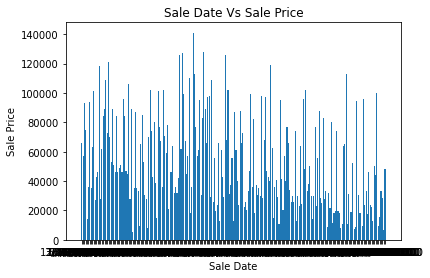

In [ ]:
fig, ax = plt.subplots()
ax.bar(df["saledate"][:1000], df["SalePrice"][:1000])
plt.xlabel('Sale Date')
plt.ylabel('Sale Price')
plt.title("Sale Date Vs Sale Price");

[Text(0.5, 1.0, 'Sale Price vs Sale Date'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Price')]

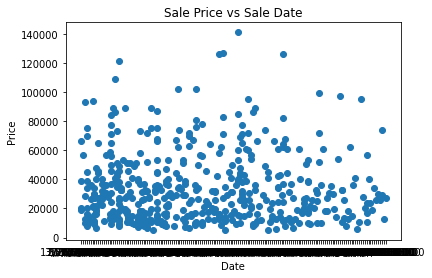

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:500], df["SalePrice"][:500])     # we are just taking 500 rows as it it's not possible to clearly see things if we plot everything
ax.set(title="Sale Price vs Sale Date", xlabel="Date", ylabel="Price")

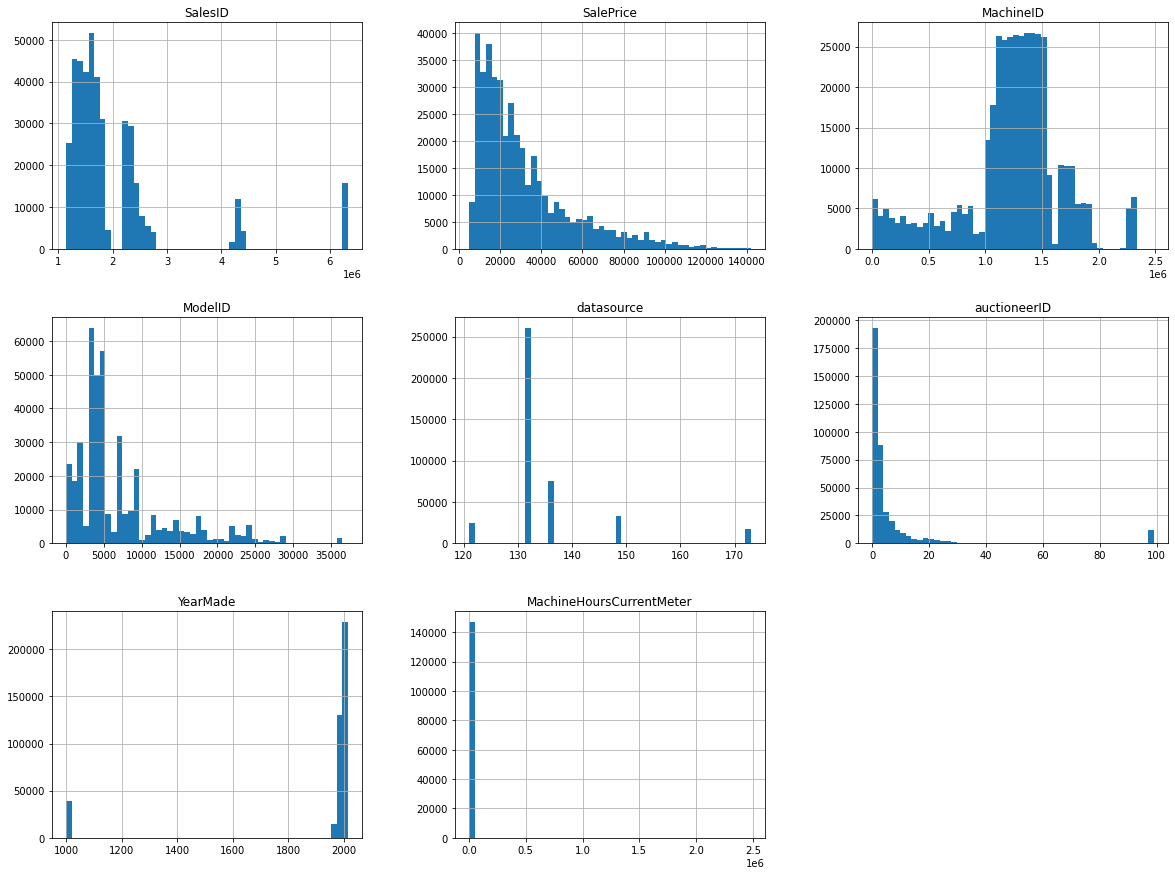

In [ ]:
# try to check relationship between different variables
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
corr_metrix = df.corr()
corr_metrix["SalePrice"].sort_values(ascending=False)    # you can use correlation to see if the target variable has any relation with other varibales if "yes" then how much

SalePrice                   1.000000
YearMade                    0.154389
SalesID                     0.023119
datasource                  0.021708
MachineHoursCurrentMeter    0.015660
ModelID                    -0.038063
auctioneerID               -0.048350
MachineID                  -0.216841
Name: SalePrice, dtype: float64

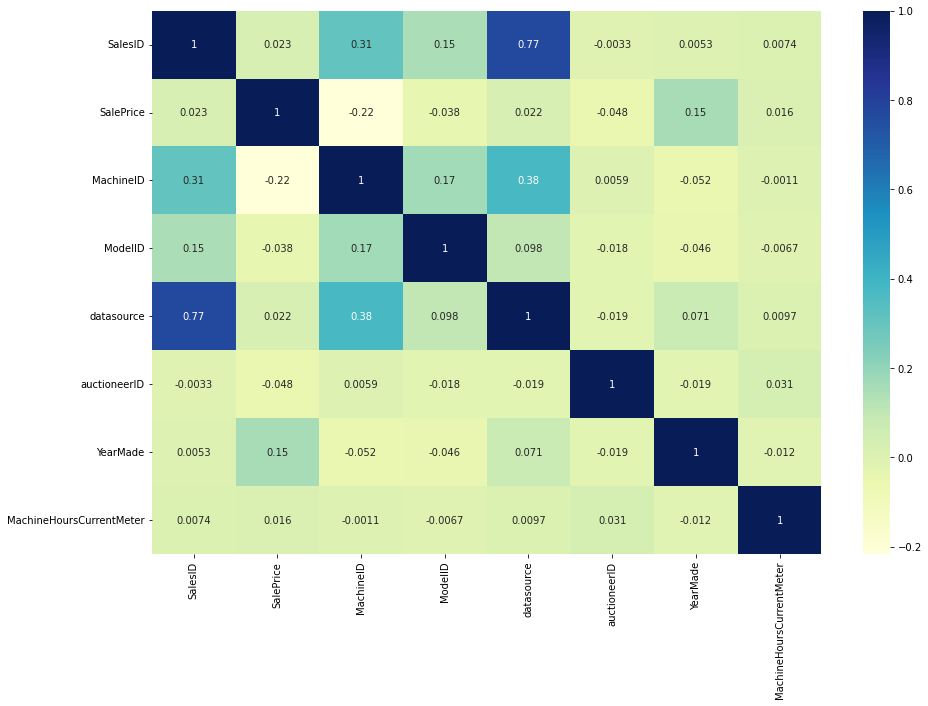

In [ ]:
# you can also use seaborn library to create correlation matrix 
import seaborn as sns 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu");

You can try to ask different questions here. How is Sale price distributed? Are there any outliers? How are graphs distributed? How they are skewed? Is there any relationship you see between the data and the variables?

In [ ]:
bullz = pd.read_csv("/content/drive/MyDrive/Data/Bluebook TrainAndValid.csv", parse_dates=["saledate"])

<ipython-input-27-f3b010073d19>:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  bullz = pd.read_csv("/content/drive/MyDrive/Data/Bluebook TrainAndValid.csv", parse_dates=["saledate"])


In [ ]:
bullz.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bullz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [ ]:
bullz["saledate"]   # see our date formatting has been changed 

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [ ]:
# Sort DataFrame in date order
bullz.sort_values(by=["saledate"], inplace=True, ascending=True)
bullz.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [ ]:
# we will be adding new columns to work with date timne 
bullz["saleYear"] = bullz.saledate.dt.year
bullz["saleMonth"] = bullz.saledate.dt.month
bullz["saleDay"] = bullz.saledate.dt.day
bullz["saleDayofweek"] = bullz.saledate.dt.dayofweek
bullz["saleDayofyear"] = bullz.saledate.dt.dayofyear

# removing original saledate column 
bullz.drop("saledate", axis=1, inplace=True)

In [ ]:
# let's check for missing values in our data 
bullz.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

As you can see we do have a lot of missing values 😶. Addiotnally, notice most of the attributes are non numerical. We can first convert them into category dtype then it will easier to convert them into numbers. 

In [ ]:
#converting string objects to category
for label, cols in bullz.items():
  if pd.api.types.is_string_dtype(cols):
    bullz[label] = cols.astype("category").cat.as_ordered()

in case you want to know what cat.as_ordered is doing: https://stackoverflow.com/questions/55232786/what-does-pd-series-cat-as-ordered-do-in-pandas

In [ ]:
# let's check 
bullz.info()   # see our object dtype is gone and now we have categories dtype 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

## Preparing Data For Machine Learning Models 
Converting non-numerics to number as ml models only accept numbers

In [ ]:
# check for numeric columns 
for label, content in bullz.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear


In [ ]:
# check for missing values in numeric columns 
for label, content in bullz.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [ ]:
# now let's fill missing values in those two columns 
for label, content in bullz.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      bullz[label+"_is_missing"] = pd.isnull(content) # adding a new column that tells if the data was missing or not
      bullz[label] = content.fillna(content.median()) # replacing the missing values using median as median is robust measure of location unaffected by outliers

In [ ]:
# check again for the missing values 
for label, content in bullz.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)  # there is not output so no missing values

In [ ]:
bullz.isnull().sum()   # now only categorical values are left to filled. 

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [ ]:
# check columns with missing values that are categorical 
for label, content in bullz.items():
  if not pd.api.types.is_numeric_dtype(content):    # see we have used 'not' to check non-numeric missing values 
    if pd.isnull(content).sum():
      print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# convert categorical variables to numbers 
for label, content in bullz.items():
  if not pd.api.types.is_numeric_dtype(content):
    bullz[label+"_is_missing"] = pd.isnull(content)   # creating a boolean column 
    bullz[label] = pd.Categorical(content).codes+1    # converting and replacing missing values 

In [ ]:
bullz.isna().sum()   # we don't have any missing values now

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [ ]:
bullz.dtypes    # check our categorical values are numeric now

SalesID                           int64
SalePrice                       float64
MachineID                         int64
ModelID                           int64
datasource                        int64
                                 ...   
Backhoe_Mounting_is_missing        bool
Blade_Type_is_missing              bool
Travel_Controls_is_missing         bool
Differential_Type_is_missing       bool
Steering_Controls_is_missing       bool
Length: 103, dtype: object

In [ ]:
bullz.tail().T  # notice the missing boolean colunns at the end

,410879,412476,411927,407124,409203
SalesID,6302984,6324811,6313029,6266251,6283635
SalePrice,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1915521,1919104,1918416,509560,1869284
ModelID,5266,19330,17244,3357,4701
datasource,149,149,149,149,149
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True
Differential_Type_is_missing,True,True,True,True,False


In [ ]:
# let's save our data so that we can start working on the pre-processed data without having to start working on everything once again. 
bullz.to_csv("/content/drive/MyDrive/Data/bullz.csv")

In [3]:
# re-initiate our pre-processed data 
bullz_df_1 = pd.read_csv("/content/drive/MyDrive/Data/bullz.csv")
bullz_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 104 entries, Unnamed: 0 to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int64(55)
memory usage: 200.7 MB


In [5]:
bullz_df_1.head()  # notice the unnamed column. It is created automatically so we need to remove it before training the model 

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,...,True,True,True,True,True,False,False,False,True,True
1,274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,...,True,True,True,True,True,True,True,True,False,False
2,141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,...,True,True,True,True,True,False,False,False,True,True
3,212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,...,True,True,True,True,True,True,True,True,False,False
4,62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,...,True,True,True,True,True,False,False,False,True,True


In [6]:
bullz_df = bullz_df_1.drop("Unnamed: 0", axis = 1)
bullz_df.head()                                      # now we have removed the unnamed column

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [7]:
bullz_df.head(50).T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,1460341,1415950,1493165,1329607,1508793,1329619,1329620,1475263,1344379,1502329
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,120000.0,40000.0,57000.0,26500.0,28000.0,27500.0,26500.0,20000.0,70000.0,35000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,458891,1142272,1440461,1089631,1255973,436674,1253848,1441275,1374638,1300019
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4140,3357,2759,4089,4138,4089,4089,7277,3819,4155
datasource,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False,False,True,True,False,True,...,False,True,False,False,False,False,False,True,True,False
Blade_Type_is_missing,False,True,False,True,False,False,True,True,False,True,...,False,True,False,False,False,False,False,True,True,False
Travel_Controls_is_missing,False,True,False,True,False,False,True,True,False,True,...,False,True,False,False,False,False,False,True,True,False
Differential_Type_is_missing,True,False,True,False,True,True,False,False,True,True,...,True,True,True,True,True,True,True,False,False,True


In [8]:
bullz_df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Training And Validation Set
According to the requirement of this project we have to divide the training and set based on dates as we are predicting the future price of the bulldozers

According to Kaggle: 
1. Training Set:data through the end of 2011.
2. Validation Set:data from January 1, 2012 - April 30, 2012. 

In [9]:
bullz_df.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [10]:
# spliting data into training and valiation set 
training_set = bullz_df[bullz_df.saleYear != 2012]  # as we have to take data until 2011
validation_set = bullz_df[bullz_df.saleYear == 2012]

In [11]:
len(training_set)

401125

In [12]:
len(validation_set)

11573

In [13]:
# once we have the train and val set we can now seperate them into dependent and independent variable for training that is X and Y

# for training set 
X_train = training_set.drop("SalePrice", axis = 1)  # removing SalePrice as it is our dependednt variable
y_train = training_set.SalePrice                    # y has dependent variable

# same for validation set 

X_val = validation_set.drop("SalePrice", axis = 1)
y_val = validation_set.SalePrice 

In [14]:
# now let's check their shapes so that we don't have any issue when calculation is performed whil training our model 
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [15]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


For our project, we have chosen RMSLE as the evaluation metric but the library we are going to use does not have RMSLE inbuilt so we can create a function of our own. 

What is RMSLE: https://hrngok.github.io/posts/metrics/ 
- RMSLE is used when y has long tail distribution, or we are interested in the ratio of true value and predicted value. 
- 0≤R²≤1 (commonly but some worst cases you will see negative values) and higher R² is better, which means the prediction is closer to the data.

In [16]:
# Evaluation Function 

from sklearn.metrics import mean_squared_log_error, mean_absolute_error     # notice we are using SK Learn Library for the modeling purpose 
def rmsle(y_test, y_preds):
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [17]:
# creating a function to show model performance 

def model_scores(model):
  train_predictions = model.predict(X_train)
  val_predictions = model.predict(X_val)
  scores = {"Training Set MAE": mean_absolute_error(y_train, train_predictions),
            "Validation Set MAE": mean_absolute_error(y_val, val_predictions), 
            "Training RMSLE":  rmsle(y_train, train_predictions),
            "Validation RMSLE": rmsle(y_val, val_predictions),
            "Training R2 Score": model.score(X_train, y_train),
            "Validation R2 Score": model.score(X_val, y_val)
  }
  return scores

In [18]:
# Let's check the number of samples in training set
len(X_train)

401125

For our machine learning model, we will be using Random Forest Regressor. The model explaining can be found in our video or the e-book

In [19]:
# for training we will not be using the entire data but a small sample of it to see how our model performs 
from sklearn.ensemble import RandomForestRegressor    # import the model from sklearn library 

# name our model and fit the data (10K samples for now)
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)


In [20]:
# Use time magic function to check the timing 
%%time 
model.fit(X_train, y_train)   # fit the model and train 

CPU times: user 42.4 s, sys: 200 ms, total: 42.6 s
Wall time: 30.8 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [21]:
model_scores(model)

{'Training Set MAE': 5566.40332966033,
 'Validation Set MAE': 7162.18661971831,
 'Training RMSLE': 0.2577965846951573,
 'Validation RMSLE': 0.29351702797256146,
 'Training R2 Score': 0.8603341278085728,
 'Validation R2 Score': 0.8333591868521966}

Now that we have some scores. Let's hypertune some parameters and see what we can achieve. 

## Hyperparameter Tuning With RandomizedSearchCV

Don't worry we will learn about RandomizedSearchCv in our book but for your refrence visit this: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/ 

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# these are different hyperparameters that we can modify and see if we can improve the model performance or not 
grid_rmf = {"n_estimators": np.arange(10, 100, 10),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2), 
            "max_features": [0.5, 1, 'sqrt', 'auto'],
            "max_samples": [10000]
            }

rscv_model = RandomizedSearchCV(RandomForestRegressor(),
                                param_distributions = grid_rmf,
                                n_iter = 20,
                                cv = 5,
                                verbose = True)

rscv_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [23]:
# best parameters from the RandomizedSearch 
rscv_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

Now we the have best parameters here. We can use these to train our model that is kind of ideal and best fit for the project. So let's do that!

In [24]:
# checking the model score 
model_scores(rscv_model)

{'Training Set MAE': 5790.377747679841,
 'Validation Set MAE': 7385.560428102013,
 'Training RMSLE': 0.26633642154957893,
 'Validation RMSLE': 0.30023609911887383,
 'Training R2 Score': 0.848940987015854,
 'Validation R2 Score': 0.8236271852105099}

In [27]:
%%time 
# now let's create our ideal model by using the best parameters from previous model training
selected_model = RandomForestRegressor(n_estimators = 20,
                                       min_samples_split = 8,
                                       min_samples_leaf = 1,
                                       max_samples = None,     #notice here we are going with entire sample
                                       max_features = 'auto',
                                       n_jobs=-1
                                       )

selected_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: user 3min 53s, sys: 470 ms, total: 3min 53s
Wall time: 2min 21s


RandomForestRegressor(max_features='auto', min_samples_split=8, n_estimators=20,
                      n_jobs=-1)

In [28]:
model_scores(selected_model)

{'Training Set MAE': 2331.9213092060636,
 'Validation Set MAE': 6253.556143624393,
 'Training RMSLE': 0.11969781967966082,
 'Validation RMSLE': 0.25859997890101594,
 'Training R2 Score': 0.9724742501071193,
 'Validation R2 Score': 0.8672400774962052}

You can further modify and experiment with the model by hypertuning its parameters and see what changes for the sake this project, We are going with the selected model as our RMSLE and R^2 score results have improved significantly after choosing to train the entire samples using the best params. 

Now we have created and selected our model. Let's now check its performance on real world unknown data that is Test Dataset and see its performance. 

Please note we will have to create the same data preprocessing for the test data as the data on which we trained our model was modified. So, to do that we can write a preprocessing function and all the new data will go through this process: 

In [29]:
# let's first save the model 
import pickle
filename = 'finalized_model.sav'
pickle.dump(selected_model, open("/content/drive/MyDrive/Colab Notebooks/model_1", 'wb'))

In [30]:
# creating a preprocessing function to make our test data set same as training set

def preprocessing_data(df):
   # Adding datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # removing original saledate column
    df.drop("saledate", axis=1, inplace=True)

    # Filling numerical missing values with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

         # Turning categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df      

Just know that here we are able to create the same preprocessing pipeline but in real world the test set may have different missing values so try to analyze the test set in the same manner as training set

In [31]:
test_dataset = pd.read_csv("/content/drive/MyDrive/Data/Test.csv", parse_dates=["saledate"]) # don't forget to use parse date otherwise preprocessing function may create error

In [32]:
test_dataset.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [33]:
# Sort DataFrame in date order
test_dataset.sort_values(by=["saledate"], inplace=True, ascending=True)
test_dataset.saledate.head(20)

1408   2012-05-01
1023   2012-05-01
1728   2012-05-01
1167   2012-05-01
1594   2012-05-01
1732   2012-05-01
1445   2012-05-01
1242   2012-05-01
1446   2012-05-01
1179   2012-05-01
1240   2012-05-01
1004   2012-05-01
1451   2012-05-01
1487   2012-05-01
1363   2012-05-01
1006   2012-05-01
1459   2012-05-01
1312   2012-05-01
1227   2012-05-01
1414   2012-05-01
Name: saledate, dtype: datetime64[ns]

In [34]:
test_set = preprocessing_data(test_dataset)  # preprocessing test data to make it compatible for model

In [35]:
test_predictions = selected_model.predict(test_set)   # making prediction 

ValueError: ignored

We are getting error here because a column seems to be missing from the test set. 

In [36]:
test_set

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,True
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,True
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,True
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,True,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,6620191,2272921,9518,172,1,2005,3525.0,0,423,154,...,True,True,True,True,True,True,True,True,True,True
9936,6620142,2297127,9579,172,1,2008,3525.0,0,1675,676,...,True,True,True,True,True,True,True,True,True,True
11620,6635116,1412453,2160,149,1,2002,3525.0,0,1722,702,...,False,False,False,False,False,True,True,True,True,True
9995,6621460,2554811,13316,149,1,2003,3525.0,0,936,341,...,False,False,False,False,False,True,True,True,True,True


In [37]:
test_set.insert(loc=56, column="auctioneerID_is_missing", value=False)  # inserting the column at the right location in test dataset

In [38]:
X_train.T

,0,1,2,3,4,5,6,7,8,9,...,401115,401116,401117,401118,401119,401120,401121,401122,401123,401124
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6311722,6261568,6261027,6261980,6260754,6260687,6312170,6312727,6315051,6260878
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1847105,1891153,434680,1557037,1907502,1074871,1812622,1811599,1858173,1799594
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,9580,4089,3538,1211,4333,4331,9580,9580,17432,4102
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,False,True,True,True,True,True,True,True,False
Blade_Type_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,False,True,True,True,True,True,True,True,False
Travel_Controls_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,False,True,True,True,True,True,True,True,False
Differential_Type_is_missing,True,False,True,False,True,True,False,False,True,True,...,True,True,True,True,False,False,True,True,True,True


In [39]:
# Make predictions on the test dataset using the best model
test_preds = selected_model.predict(test_set)

In [40]:
# Creating a DataFrame to visualize things 
df_preds = pd.DataFrame()
df_preds["SalesID"] = test_set["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
1408,4317459,10879.234848
1023,4249784,16885.965639
1728,4392603,22099.661797
1167,4274831,27293.932497
1594,4362801,10693.161977
...,...,...
9941,6620191,7364.447421
9936,6620142,13384.337662
11620,6635116,45238.446970
9995,6621460,45356.116696


In [41]:
# Export to csv...
df_preds.to_csv("/content/drive/MyDrive/Data/predictions.csv")

In [42]:
# Find feature importance of our best model - which features were most important when it comes to predicting the target variable
selected_model.feature_importances_

array([4.86297999e-02, 1.42734082e-02, 3.31125477e-02, 2.54235324e-04,
       3.78125101e-03, 2.66290697e-01, 2.73726470e-03, 9.55153156e-04,
       2.01427945e-02, 8.02689414e-02, 5.24904783e-02, 4.37330850e-03,
       3.37265879e-03, 2.32737589e-01, 3.63703226e-02, 7.61701035e-03,
       2.06286892e-04, 1.88346769e-04, 1.78003126e-03, 8.15084397e-03,
       3.42370080e-04, 2.87854605e-05, 4.92013605e-04, 1.64010326e-04,
       1.39493701e-03, 2.09708285e-05, 7.70517025e-04, 7.88101473e-03,
       1.10305238e-04, 4.86527256e-05, 3.32489926e-03, 1.83414685e-03,
       2.20928990e-03, 5.63138403e-03, 1.85527270e-04, 1.67888471e-03,
       8.72241564e-04, 1.53679900e-02, 3.97621174e-06, 3.31754324e-06,
       1.55028892e-04, 8.97296158e-04, 1.18916573e-03, 6.31161735e-04,
       1.66246608e-04, 4.10819263e-04, 1.74681117e-04, 1.46565265e-03,
       8.65035898e-04, 1.46882616e-04, 2.13240605e-04, 7.67758053e-02,
       2.42032458e-03, 7.54496800e-03, 3.70554868e-03, 1.34456455e-02,
      

In [52]:
# this above is same as 
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [49]:
# we can use the graph to show our important features 

import seaborn as sns
def plot_features(columns, importances, n=20):    # n = 20 means we are only taking into account 20 values 
    df = (pd.DataFrame({"features": columns,      # creating data frame
                        "feature_importance": importances})   
          .sort_values("feature_importance", ascending=False)  # sorting the values 
          .reset_index(drop=True))
    
    # plotting 
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

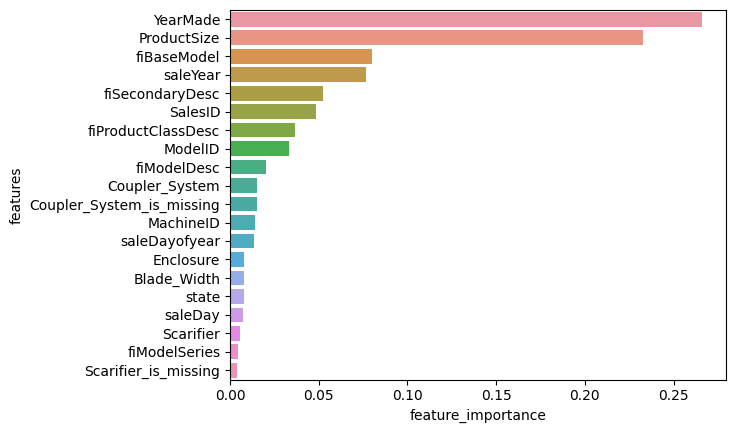

In [46]:
plot_features(X_train.columns, selected_model.feature_importances_)

In [47]:
sum(selected_model.feature_importances_)

0.9999999999999998

Now that we have created our machine learning project. You can also try to use different machine learning models to check which one performs best. 